# Introduction: Neural Network for learning/processing time-series/historical data/signal

In this project, we'll build a neural network (NN) to learn and process historical/time-series signal data.
The dataset, used in this project, is the smartwatch multisensor dataset acquired and collected by AnEAR app installed on a smartphone.
This dataset is provided in the framework of ED-EAR project which is financially supported by NIH.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load, explore, prepare, and preprocess the dataset

The first critical step is loading/downloading, exploring, and preparing the dataset correctly. 
Variables/values on different scales make it difficult for the NN to efficiently learn the correct parameters (e.g. weights and biases).

In [2]:
# The smartwatch historical/time-seris data to visualize
data_path_1xn = 'data/smartwatch_data/experimental_data_analysis/Basis_Watch_Data.csv'
watch_txn = pd.read_csv(data_path_1xn)

### Downloading/ checking out the smartwatch dataset

Smartwatch dataset has the number of sensors time-seris data.
The sensors data, recorded from the smartwatch, are following: GSR, heart rate, tempareture, lighting, contact, and ...
Below is a plot showing the smartwatch multisensor dataset. 
Looking at the dataset, we can have information about different sensors modality and values. 

In [3]:
# txn: time-space from the space-time theory
watch_txn.head()

# Exploring the data rows-t and cols-n
watch_txn[:20]

# Getting rid of NaN
watch_txn = watch_txn.fillna(value=0.0)
watch_txn[:100]

,date,calories,gsr,heart-rate,skin-temp,steps
0,2014-08-08 15:18Z,0.4,0.000000,0.0,0.0000,0.0
1,2014-08-08 15:19Z,1.4,0.000000,0.0,0.0000,0.0
2,2014-08-08 15:20Z,1.4,0.000000,0.0,0.0000,0.0
3,2014-08-08 15:21Z,1.3,0.000000,0.0,0.0000,0.0
4,2014-08-08 15:22Z,1.4,0.000000,0.0,0.0000,0.0
5,2014-08-08 15:23Z,1.4,0.000000,0.0,0.0000,0.0
6,2014-08-08 15:24Z,1.4,0.000000,0.0,0.0000,0.0
7,2014-08-08 15:25Z,1.4,0.000000,0.0,0.0000,0.0
8,2014-08-08 15:26Z,1.4,0.000000,0.0,0.0000,0.0
9,2014-08-08 15:27Z,1.4,0.000000,0.0,0.0000,0.0


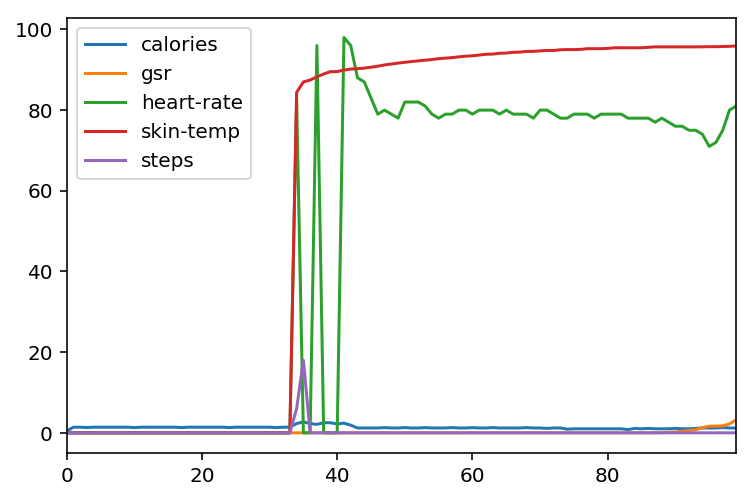

In [4]:
# Plotting the smartwatch data
watch_txn[:100].plot() #x='dteday', y='cnt'

### Batch normalization for standardizing the dataset using mean and variance/ scaling the data

For training NN easier and more efficiently on the dataset, we should normalize/standardize each of the continuous variables in the dataset. 
we'll shift/translate and scale the variables such that they have zero-mean and a standard deviation of 1.
These scaling factors are saved to add up to the NN predictions eventually.

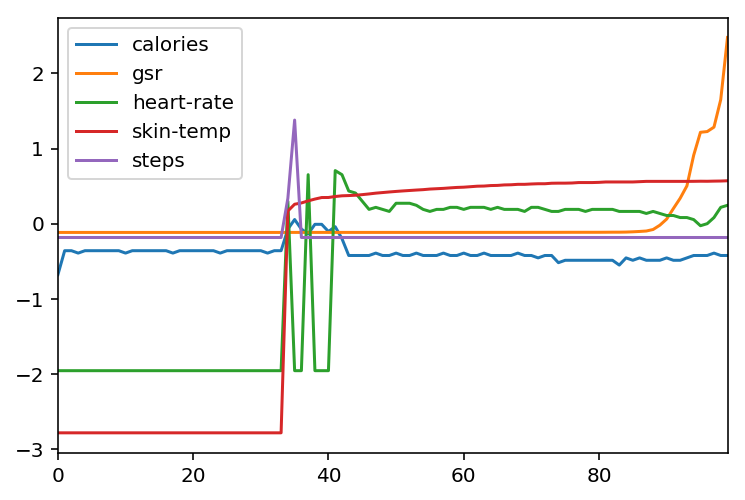

In [5]:
features_1x5 = ['calories', 'gsr', 'heart-rate', 'skin-temp', 'steps']

# Store scalings in a dictionary so we can convert back later
scaled_features_5x2 = {}
for each_name in features_1x5:
    mean_1x1_val, std_1x1_val = watch_txn[each_name].mean(), watch_txn[each_name].std() # std: standard dev. = square-root of MSE/Variance
    scaled_features_5x2[each_name] = [mean_1x1_val, std_1x1_val]
    watch_txn.loc[:, each_name] = (watch_txn[each_name] - mean_1x1_val)/std_1x1_val

# Drop date from the dataset
watch_txn = watch_txn.drop(labels='date', axis=1)

# Visualize the data again to double-check visually again
watch_txn[:100].plot()

### Splitting the dataset into training, validation, and testing sets

We'll use the last 1% of the dataset for testing the NN after training and validation to make predictions.

In [6]:
# Save 1% data for test
test_limit_1x1_value = watch_txn.shape[0]//100
test_data_txn = watch_txn[-test_limit_1x1_value:]

# Now remove the test data from the data set for the training data 
watch_txn = watch_txn[:-test_limit_1x1_value]

# Separate all the data into features and targets
target_fields_1x1 = ['steps']
features_txn, targets_txm = watch_txn.drop(target_fields_1x1, axis=1), watch_txn[target_fields_1x1]
test_features_txn, test_targets_txm = test_data_txn.drop(target_fields_1x1, axis=1), test_data_txn[target_fields_1x1]
test_features_txn.shape, test_targets_txm.shape, features_txn.shape, targets_txm.shape

((10113, 4), (10113, 1), (1001234, 4), (1001234, 1))

### Dividing the remaining data into training and validation sets to avoid overfitting and underfitting during the training

We'll split the remaining data into two sets: one for training and one for validating as NN is being trained. 
Since this is a time-series dataset, we'll train on historical data, then try to predict on future data (the validation set).

In [7]:
# For validation set, we use 10% the remaining datset
# txn: t is time/row (num of records) and n is space/col (input feature space dims)
# txm: t is time/row (num of records) and m is space/col (output feature space dims)
train_features_txn, train_targets_txm = features_txn[:-(features_txn.shape[0]//10)], targets_txm[:-(targets_txm.shape[0]//10)]
valid_features_txn, valid_targets_txm = features_txn[-(features_txn.shape[0]//10):], targets_txm[-(targets_txm.shape[0]//10):]
train_features_txn.shape, train_targets_txm.shape, valid_features_txn.shape, valid_targets_txm.shape

((901111, 4), (901111, 1), (100123, 4), (100123, 1))

## How to build the NN

Below we'll build NN architecture for learning and processing the time-series dataset. 
We've built NN architecture for the forward and the backward pass. 

we'll set the hyperparameters: the momentum, the learning rate, the number of hidden units, the number of input units, the number of output units, and the number of epochs for training passes (updating the NN parameters such as weights and biases).

The NN has three layers in general and in our case: one input layer, one/multiple hidden layer/s, and one output layer. 
The hidden layer/s uses a non-linear function for activations/probability such as the sigmoid and tanh. 
The output layer, in our case, has one node and is used for the regression, i.e. the output of the node is the same as the input of the node.
That is why the activation function is a linear unit (LU) $f(x)=x$. 

A function that takes the input signal and generates an output signal, but takes into account a threshold, is called an activation function. 
We work through each layer of our network calculating the outputs for each neuron. 
All of the outputs from one layer become inputs to the neurons on the next layer. 
This process is called *forward propagation* which happens in forward pass.

We use the NN weights to propagate signals forward (in forward pass) from the input to the output layers in NN. 
We use the weights to also propagate error backwards (in backward pass) from the output all the way back into the NN to update our weights. 
This is called *backpropagation*.

> **Hint:** We'll need the derivative of the output activation function ($f(x) = x$) for the backpropagation implementation. 
Based on calculus, the derivative of this function is equivalent to the equation $y = x$. 
In fact, the slope of this function is the derivative of $f(x)$.

Below, we'll build the NN as follows:
1. Implement/apply an activation function such as sigmoid, tanh, or ReLU.
2. Implement the forward pass in the `train` method for forward propagation of the input data.
3. Implement the backpropagation algorithm in the `train` method in the backward pass by calculating the output error and the parameter gradients.
4. Implement the forward pass again at the end in the `run` method for the actual prediction in validation data and test data.

In [8]:
class NN(object):
    # n: num_input_units in input layer, 
    # h: num_hidden_units in the hidden layer, 
    # m: num_out_units in the output layer, and 
    # lr: learning_rate
    def __init__(self, n, h, m, lr):
        # Initialize parameters: weights and biases
        self.w_nxh = np.random.normal(loc=0.0, scale=n**(-0.5), size=(n, h))
        self.b_1xh = np.zeros(shape=(1, h))

        self.w_hxm = np.random.normal(loc=0.0, scale=h**(-0.5), size=(h, m))
        self.b_1xm = np.zeros(shape=(1, m))

        self.lr = lr
    
    # Train to update NN paramteres (w, b) in each epoch using NN hyper-parameters
    def train(self, X_txn, Y_txm):
        ''' Train the network on batch of features (X_txn) and targets (Y_txm). 
        
            Arguments
            ---------
            
            features: X_txn is a 2D array, each row is one data record (t), each column is a feature (n)
            txn: ixj, rowxcol, and hxw
            targets: Y_txm is a 2D array as well.
        
        '''
        dw_nxh = np.zeros_like(self.w_nxh)
        db_1xh = np.zeros_like(self.b_1xh)
        dw_hxm = np.zeros_like(self.w_hxm)
        db_1xm = np.zeros_like(self.b_1xm)
        
        for each_X, each_Y in zip(X_txn, Y_txm):
            #### Implement the forward pass here ####
            ### Forward pass ###
            x_1xn = np.array(each_X, ndmin=2) # [[each]]
            y_1xm = np.array(each_Y, ndmin=2) # [[each]]
            
            # TODO: Hidden layer - Replace these values with your calculations.
            h_in_1xh = (x_1xn @ self.w_nxh) + self.b_1xh # signals into hidden layer
            h_out_1xh = np.tanh(h_in_1xh)

            # TODO: Output layer - Replace these values with your calculations.
            out_logits_1xm = (h_out_1xh @ self.w_hxm) + self.b_1xm # signals into final output layer
            y_pred_1xm = np.tanh(out_logits_1xm) # signals from final output layer
            
            #### Implement the backward pass here ####
            ### Backward pass ###
            dy_1xm = y_pred_1xm - y_1xm # Output layer error: difference between actual target and desired output.

            # TODO: Output error - Replace this value with your calculations.
            dout_logits_1xm = dy_1xm * (1-(np.tanh(out_logits_1xm)**2)) # dtanh= (1-(np.tanh(x))**2)
            dh_out_1xh = dout_logits_1xm @ self.w_hxm.T
            
            # TODO: Calculate the hidden layer's contribution to the error
            dh_in_1xh = dh_out_1xh * (1-(np.tanh(h_in_1xh)**2))
            dx_1xn = dh_in_1xh @ self.w_nxh.T # is dx_1xn USELESS?
            
            # TODO: Backpropagated error terms - Replace these values with your calculations.
            db_1xm += dout_logits_1xm
            dw_hxm += (dout_logits_1xm.T @ h_out_1xh).T
            db_1xh += dh_in_1xh
            dw_nxh += (dh_in_1xh.T @ x_1xn).T
            
        # TODO: Update the NN parameters (w, b) in each epoch of training
        self.w_hxm -= self.lr * dw_hxm # update hidden-to-output weights with gradient descent step
        self.b_1xm -= self.lr * db_1xm # output units/neurons/cells/nodes
        self.w_nxh -= self.lr * dw_nxh # update input-to-hidden weights with gradient descent step
        self.b_1xh -= self.lr * db_1xh # hidden units/cells/neurons/nodes
 
    def run(self, X_txn):
        ''' Run a forward pass through the network with input features 
        
            Arguments
            ---------
            features: X_txn is a 2D array of records (t as row) and their features (n as col)
        '''
        
        #### Implement the forward pass here ####
        ### Forward pass ###
        x_txn = X_txn

        # TODO: Hidden layer - Replace these values with your calculations.
        h_in_txh = (x_txn @ self.w_nxh) + self.b_1xh # signals into hidden layer
        h_out_txh = np.tanh(h_in_txh)

        # TODO: Output layer - Replace these values with your calculations.
        out_logits_txm = (h_out_txh @ self.w_hxm) + self.b_1xm # signals into final output layer
        y_pred_txm = np.tanh(out_logits_txm) # signals from final output layer
        
        return y_pred_txm

In [9]:
# Mean Squared-Error(MSE)
def MSE(Y_pred_1xt, Y_1xt):
    return np.mean((Y_pred_1xt-Y_1xt)**2)

## Training the NN

At first, we'll set the hyperparameters for the NN. 
The strategy here is to find hyperparameters such that the error on the training set is the low enough, but you're not underfitting or overfitting to the training set. 

If you train the NN too long or NN has too many hidden nodes, it can become overly specific to the training set and will fail to generalize to the validation set. 
That is, the loss on the validation set will start increasing as the training set loss drops.

We'll also be using a method known as Stochastic Gradient Descent (SGD) to train the NN using Backpropagation. 
The idea is that for each training pass, you grab a either a random minibatch of the data instead of using the whole data set/full batch.

We can also use bacth gradient descent (BGD), but with SGD, each pass is much faster than BGD. 
That is why as the data size grows in number of samples, BGD is not feasible for training the NN and we have to use SGD instead to consider our hardware limitation, specifically the memory size limits, i.e. RAM and Cache.

### Epochs: choose the number of iterations for updating NN parameters
This is the number of times to update the NN parameters using the training dataset as we train the NN. 
The more iterations we use, the better the model might fit the data. 
However, if you use too many epoch iterations, then the model might not generalize well to the data but memorize the data which is called/known as overfitting. 
You want to find a number here where the network has a low training loss, and the validation loss is at a minimum. 
As you start overfitting, you'll see the training loss continue to decrease while the validation loss starts to increase.

### Learning rate
This scales the size of the NN parameters updates. 
If it is too big, the weights tend to explode and the network fails to fit the data. 
A good choice to start at is 0.1. 
If the NN has problems fitting the data, try reducing the learning rate. 
Note that the lower the learning rate, the smaller the steps are in the weight updates and the longer it takes for the NN to converge.

### Number of hidden nodes
The more hidden nodes you have, the more accurate predictions the model will make. 
Try a few different numbers and see how it affects the performance. 
You can look at the losses dictionary for a metric of the NN performance. 
If the number of hidden units is too low, then the model won't have enough space to learn and 
if it is too high there are too many options for the direction that the learning can take. 
The trick here is to find the right balance in number of hidden units you choose.

In [13]:
### Set the hyperparameters here ###
num_epochs = 100*2 # updating NN parameters (w, b)
learning_rate = 2 * 10/train_features_txn.shape[0] # train_features = x_txn, t: number of recorded samples/records
hidden_nodes = 10
output_nodes = 1 # y_tx1
input_nodes = train_features_txn.shape[1] # x_txn

# Buidlingthe NN by initializing/instantiating the NN class
nn = NN(h=hidden_nodes, lr=learning_rate, m=output_nodes, n=input_nodes)

# Training-validating the NN - learning process
losses_tx2 = {'train':[], 'valid':[]}
for each_epoch in range(num_epochs):
    
    # Go through a random minibatch of 128 records from the training data set
    random_minibatch = np.random.choice(train_features_txn.index, size=1024)
    x_txn, y_tx1 = train_features_txn.ix[random_minibatch].values, train_targets_txm.ix[random_minibatch].values #['cnt']
    
    #     # Go through the full batch of records in the training data set
    #     x_txn , y_tx1 = train_features_txn.values, train_targets_txm.values #['cnt']
    
    nn.train(X_txn=x_txn, Y_txm=y_tx1)
    
    # Printing out the training progress
    train_loss_1x1_value = MSE(Y_pred_1xt=nn.run(X_txn=train_features_txn).T, Y_1xt=train_targets_txm.values.T)
    valid_loss_1x1_value = MSE(Y_pred_1xt=nn.run(X_txn=valid_features_txn).T, Y_1xt=valid_targets_txm.values.T)
    print('each_epoch:', each_epoch, 'num_epochs:', num_epochs, 
          'train_loss:', train_loss_1x1_value, 'valid_loss:', valid_loss_1x1_value)
    
    losses_tx2['train'].append(train_loss_1x1_value)
    losses_tx2['valid'].append(valid_loss_1x1_value)

each_epoch: 0 num_epochs: 200 train_loss: 0.978365532452 valid_loss: 1.13290153322
each_epoch: 1 num_epochs: 200 train_loss: 0.976941679871 valid_loss: 1.13208449344
each_epoch: 2 num_epochs: 200 train_loss: 0.975100555383 valid_loss: 1.1310094727
each_epoch: 3 num_epochs: 200 train_loss: 0.973647895674 valid_loss: 1.12978582152
each_epoch: 4 num_epochs: 200 train_loss: 0.972150057872 valid_loss: 1.12875086867
each_epoch: 5 num_epochs: 200 train_loss: 0.970465517152 valid_loss: 1.12782864001
each_epoch: 6 num_epochs: 200 train_loss: 0.968759241715 valid_loss: 1.12709619887
each_epoch: 7 num_epochs: 200 train_loss: 0.967234547325 valid_loss: 1.12628810384
each_epoch: 8 num_epochs: 200 train_loss: 0.965866334052 valid_loss: 1.1253920888
each_epoch: 9 num_epochs: 200 train_loss: 0.964243180455 valid_loss: 1.12482000932
each_epoch: 10 num_epochs: 200 train_loss: 0.962661976304 valid_loss: 1.12401646486
each_epoch: 11 num_epochs: 200 train_loss: 0.961090842223 valid_loss: 1.1233575641
each_

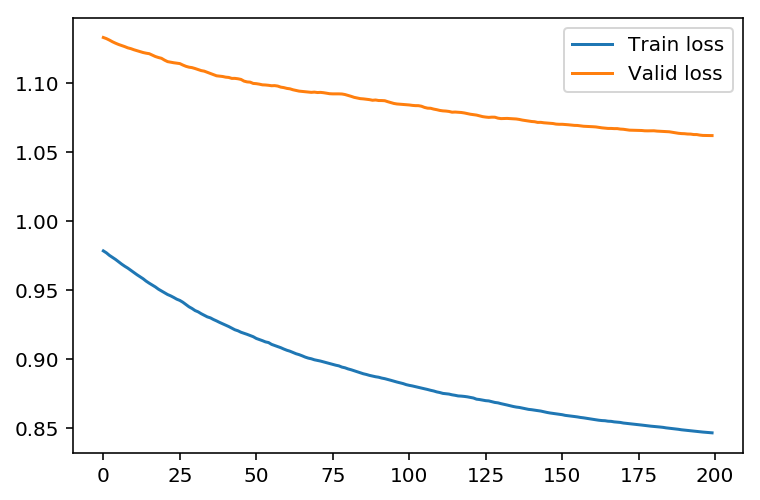

In [14]:
plt.plot(losses_tx2['train'], label='Train loss')
plt.plot(losses_tx2['valid'], label='Valid loss')
plt.legend()
_ = plt.ylim()

## Test predictions

Here, we test our NN on the test data to view how well the NN is modeling/predicting the test dataset. 
If something is wrong, the NN is NOT implemented correctly.

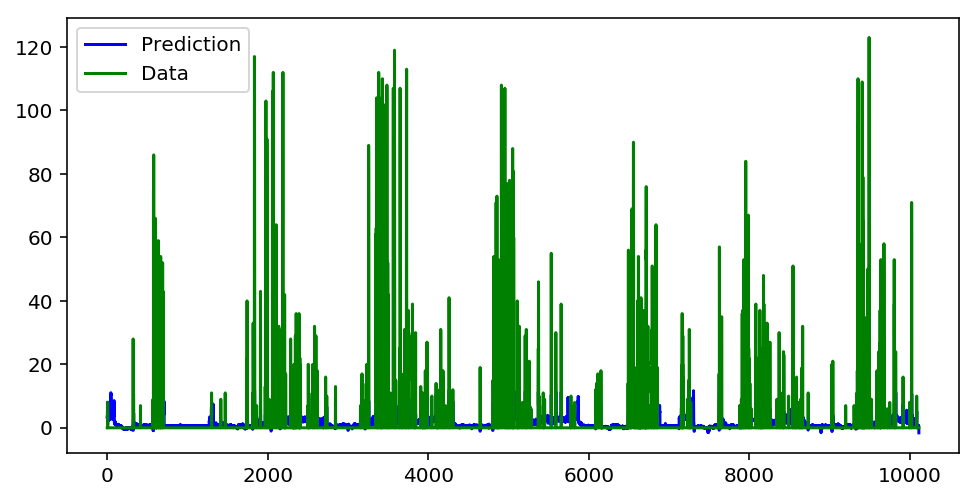

In [34]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features_5x2['steps']
predictions_1xt = nn.run(X_txn=test_features_txn).T*std + mean
ax.plot(predictions_1xt[0], label='Prediction', color='b')
ax.plot((test_targets_txm*std + mean).values, label='Data', color='g')
ax.legend()

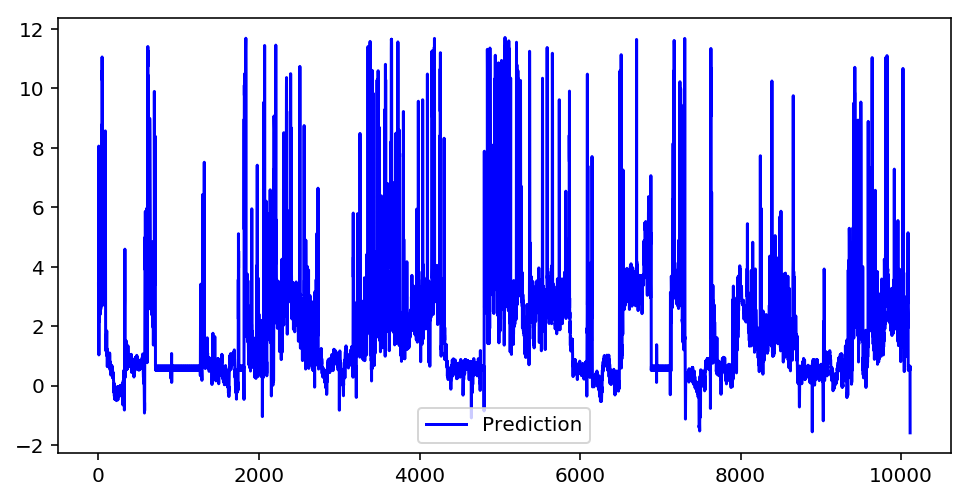

In [35]:
fig, ax_pred = plt.subplots(figsize=(8,4))
ax_pred.plot(predictions_1xt[0], label='Prediction', color='b')
ax_pred.legend()

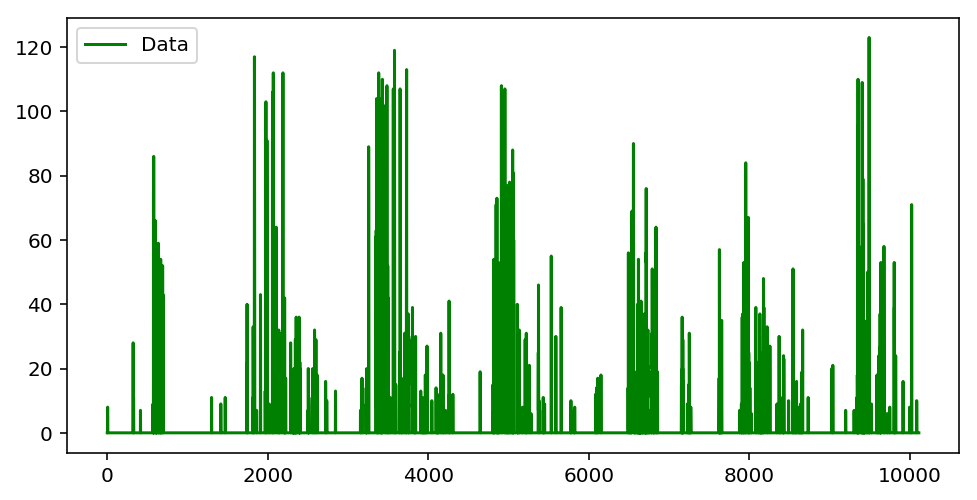

In [36]:
fig, ax_data = plt.subplots(figsize=(8,4))
ax_data.plot((test_targets_txm*std + mean).values, label='Data', color='g')
ax_data.legend()

# Discussion: Thinking about our results for conclusion and wrap-up.
 
Answer these questions concluding our results or for drawing conclusion out of the results:
How well does the NN predict/model the data? 
Where does it fail? 
Why does it fail in the place it fails?